# Titanic Homework  Task

**Created by Dr. James G. Shanahan**

By now we have learned how to solve a problem from end to end using SKLearn, and using pipelines. For example, we learned how to  predict house prices in California, how to classify images, etc.
In this homework,  we push pipelines to the next level as we incorporate feature engineering directly in to the modeling workflow via SKlearn's `Pipeline` class. This will be done in the context of the Titanic Survival classification problem. The following figure gives a quick overview of a possible classification pipeline that you will  be building to solve this challenge.

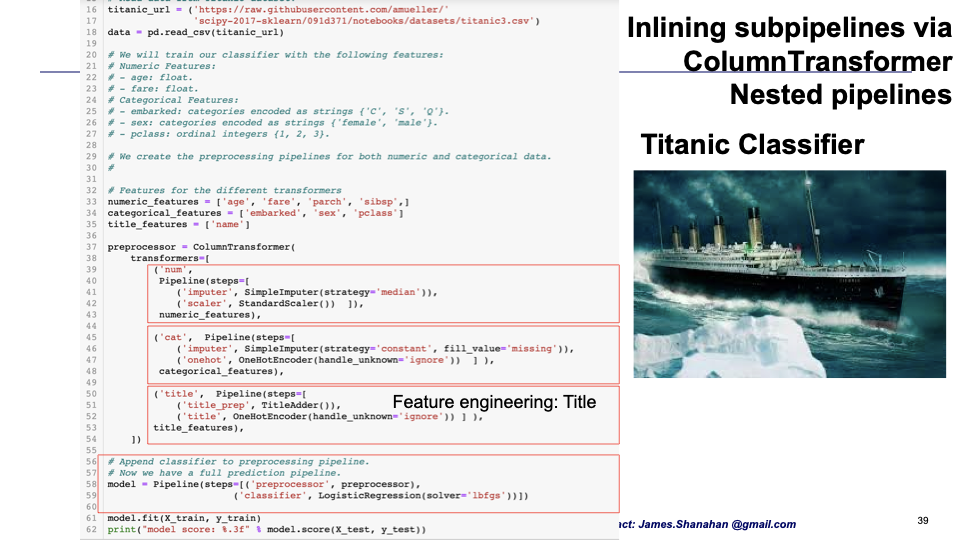

# Submission instructions
1. Before completing this homework,
    * please review this homework's submission form on Canvas available under the "Modules" menu option and 
    * briefly review this notebook end to end. 
* To get you started we provide a template solution with missing code and prompts. Please complete the missing code, run the experiments and log your results.
* When you're sufficiently happy with your results, please begin the submission process on Canvas. Use the submission form for this homework available under "Modules" menu option. Please note that the submission form is available at the same place where you downloaded the homework from.
* You may wish to reference this quiz while working through the tasks.

You will need to:

* __Important:__ To ensure the accuracy of your results (for the quiz) you must split the data using a 20% test set with random seed = 42.
* __EDA.__ Identify the types of data available, evaluate basic statistical information about the data and determine whether you have any missing or misformated data.

* __Feature Engineering.__  Develop at least one new feature.  The following [webpage](http://trevorstephens.com/kaggle-titanic-tutorial/r-part-4-feature-engineering/) has some great ideas for creating new features on the Titanic dataset.
* __Pre-processing.__  All work must be performed using pipelines.  You can adapt code provided or develop your own.
* __Evaluation.__ Select appropriate metrics for the problem to evaluate your models.
* __Reporting.__ Record all experiments in a table of results (pandas dataframe) including at least the following information:  
    * description of the model (algorithim, notable processing steps) 
    * key hyperparameters
    * results (using one or more appropriate metrics)
    * run time for each experiment (train and test results)

Your  pipelines will take the following general form:

<PRE>
full_pipeline_with_predictor = Pipeline([
        ("preparation", data_pipeline),# combination of numerical, categorical, derived features  subpipelines
        ("logRegression", LogisticRegression())  # classifier estimator you are using
    ])

</PRE>

# Data import and EDA

The goal of this section is to get familiar with the data that will be used for training and testing various end to end survivor classifier pipelines. These survivor classifier pipelines  will be constructed and tested later in this notebook. 

While the main goal of this homework is to predict if a passenger  surives the Titanic sinking or not, this section focuses on doing an EDA of the Titanic training dataset before embarking on the pipeline-based modeling.

While doing EDA, we can get insights into the following: 
1. What are the profiles of people who survive and not survive?
* Is it true that kids and women are prioritized to survive?
* How does the existence of siblings and parents affect the likelihood to survive?
* Get ideas for  feature engineering 

## Titanic Dataset
A total of 2,208 people sailed on the maiden voyage of the RMS Titanic, the second of the White Star Line's Olympic-class ocean liners, from Southampton, England, to New York City. Partway through the voyage, the ship struck an iceberg and sank in the early morning of 15 April 1912, resulting in the deaths of 1,496 people, including about 815 of the passengers. For more details on the tragic incident, see [wikipedia](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic).  

The following graphic from [wikipedia](https://en.wikipedia.org/wiki/Passengers_of_the_RMS_Titanic) presents a breakdown of the survivors versus victoms for each class of passenger and for the crew. 

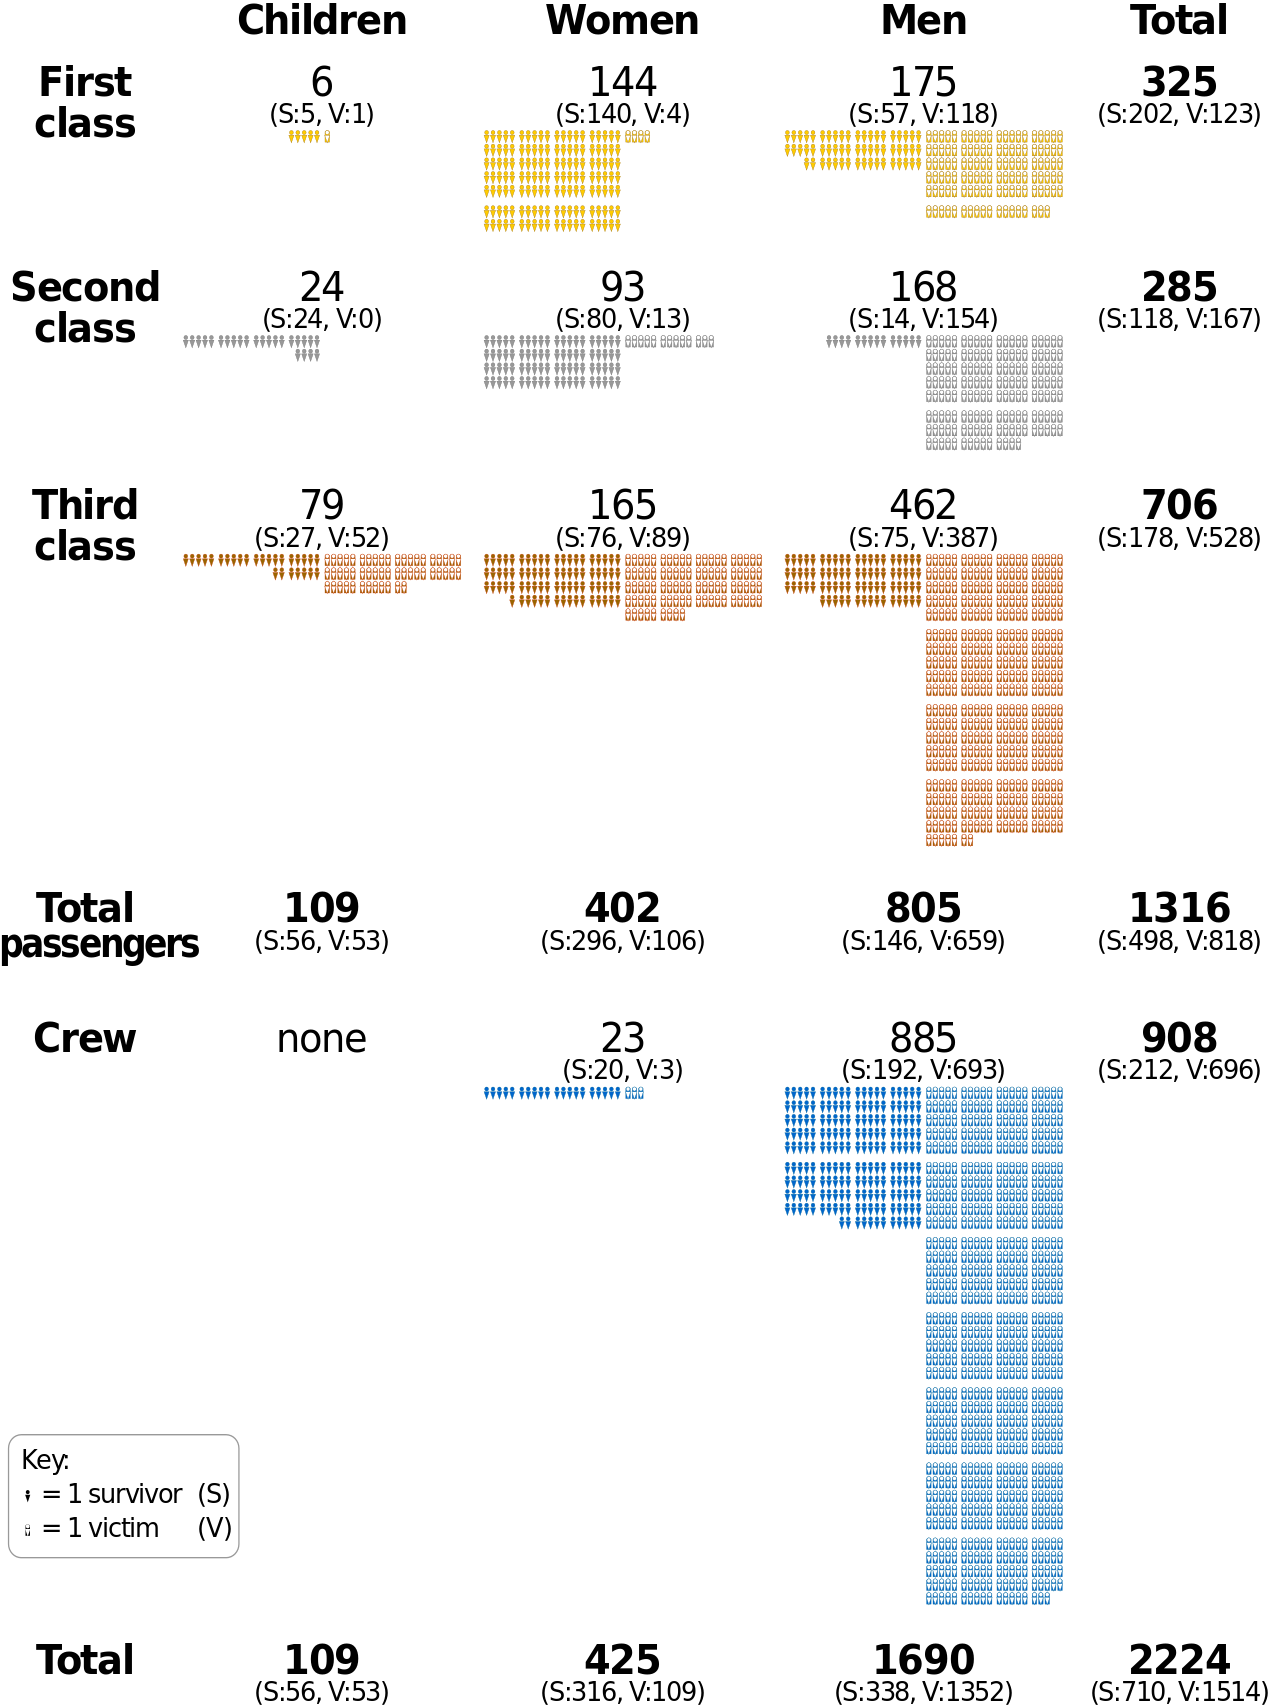

In [1]:
from IPython import display
display.Image("https://upload.wikimedia.org/wikipedia/commons/thumb/6/69/Titanic_casualties.svg/1280px-Titanic_casualties.svg.png", width=500)


## Data Dictionary

### Variable  descriptions:
The Titanic dataset has the  following features for each passenger:
* PassengerId: Id of every passenger.
* Survived: This feature have value 0 and 1. I.e., 0 for not survived and 1 for survived.
* Pclass: There are 3 classes of passengers.
  * Passenger Class:  1 = 1st; 2 = 2nd; 3 = 3rd
* Name: Name of passenger.
* Sex: Gender of passenger.
* Age: Age of passenger.
* SibSp: Indication of the Number of Siblings/Spouses that a passenger has aboard
* Parch: Indication of the Number of Parents/Children that a passenger has aboard.
* Ticket: Ticket no of passenger.
* Fare: Indicating the fare.
* Cabin: The cabin of passenger.
* Embarked: Port of Embarkation
  * (C = Cherbourg; Q = Queenstown; S = Southampton)
    
### SPECIAL NOTES:
* Pclass is a proxy for socio-economic status (SES)
  * 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

* Age is in Years; Fractional if Age less than One (1)
  * If the Age is Estimated, it is in the form xx.5

* With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch:
  * Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
  * Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
  * Parent:   Mother or Father of Passenger Aboard Titanic
  * Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

* Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.


## Load the data and split into train, validation and test subsets

In [ ]:
#!ls ./datasets/titanic/

In [ ]:
# imports
import warnings
warnings.simplefilter('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
import re
from time import time
from scipy import stats
import json

import numpy as np
import pandas as pd
# Read data from Titanic dataset.
data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket',  'PassengerId'], axis = 1)  #keep Cabin for EDA

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")
X_train.head()



The  `PassengerId`  and `Ticket` features are identifiers, unique to each passenger, and as such will not contribute any predictive power to a person's survival probability. So they will be dropped from all future analysis. We will keep `Cabin` in our EDA but will drop it for most of our experiments except one where you will develop a new feature around it as one of your final tasks in this homework. 


### For analysis purposes let concatenate  X_train and y_train

In [ ]:
Xy_train = pd.concat([X_train, y_train], axis=1)
Xy_train.head()

In [ ]:
#where int64 and float64 are potential numerical features and object  are potential categorical features 
#
Xy_train.info()

In [ ]:
Xy_train.describe() # examines the numeric features only

Above we can see that 38% out of the training-set survived the Titanic. We can also see that the passenger ages range from 0.4 to 80. On top of that we can already detect some features, that contain missing values, like the ‘Age’ feature (within the numerical features; see below for categorical features).

In [ ]:
sum(y_train)/len(y_train) # percentage of people who survived

### Descriptive Statistics for numerical and  categorical data including missing values
Use the describe() method on a Pandas DataFrame to get statistics of columns or you could call this method directly on a series. We'll call it on the DataFrame below.

* count shows the number of responses
* unique shows the number of unique categorical values
* top shows the highest-occuring categorical value
* freq shows the frequency/count of the highest-occuring categorical value

```python 
DataFrame.describe(include = 'all') 
``` 
to get a summary of `all` the columns when the dataframe has mixed column types. The default behavior is to only provide a summary for the numerical columns.



#### data.describe(include='all') and missing values analysis

In [ ]:
Xy_train.describe(include='all') # examines the numeric features and categorical features

In [ ]:
#  Fill code to find which column number had the most missing values
#print(f"{......} has the most missing values")

print(f"{np.argmax(Xy_train.isna().sum().sort_values())} has the most missing values")

In [ ]:
Xy_train.shape

In [ ]:
Xy_train.dtypes.value_counts()

### determine the categorical and numerical features

In [ ]:
numerical_ix = Xy_train.select_dtypes(include=['int64', 'float64']).columns
categorical_ix = Xy_train.select_dtypes(include=['object', 'bool']).columns
print(f"numerical   features: {list(numerical_ix)}")
print(f"categorical features: {list(categorical_ix)}")

## Correlation Observations

### Review: Correlation between a continous input variable and a discrete output variable

Measuring correlation between a continous input variable and a discrete output variable is possible the target variable has only  two levels. In that binary case, you can use point [biserial correlation]( https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient).
For some great backgound see:
* binary case: see  https://en.wikipedia.org/wiki/Point-biserial_correlation_coefficient
* n-ary case: see 
  *  https://stats.stackexchange.com/questions/119835/correlation-between-a-nominal-iv-and-a-continuous-dv-variable/124618#124618


#### Case 1: When an  Variable Only Has Two Values
**Point Biserial Correlation** 
If a categorical variable only has two values (i.e. true/false), then we can convert it into a numeric datatype (0 and 1). Since it becomes a numeric variable, we can find out the correlation using the dataframe.corr() function.

Let's create a dataframe which will consist of two columns: `Employee Type` (EmpType) and `Salary`.

Purposely, we will assign more salary to `EmpType1`. This way we will get some correlation between EmpType and Salary.

Create a dataframe with the following properties:

Mean (average) salary of EmpType1 is 60 with a standard deviation of five.

Mean (average) salary of EmpType2 is 50 with a standard deviation of five.

In [ ]:
import pandas as pd
import numpy as np
num1=np.random.normal(loc=60,scale=5,size=100)
df1=pd.DataFrame(num1,columns=['Salary'])
df1['Type']='EmpType1'
num2=np.random.normal(loc=50,scale=5,size=100)
df2=pd.DataFrame(num2,columns=['Salary'])
df2['Type']='EmpType2'
df=pd.concat([df1,df2],axis=0)
# Since Categorical variable 'Type' has only 2 values we will convert it into numeric (0 and 1) datatype.
df['TypeInt']=(df['Type']=='EmpType1').astype(int)
df.corr()

#### Case 2: When an Independent Variable Only Has more   Values : THIS IS NOT CORRECT!

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from IPython.display import display
# load the data
iris = load_iris()
all_iris = pd.DataFrame.from_records(data=np.c_[iris.data, iris.target], columns=iris.feature_names+["class"])

display(all_iris)
all_iris.corr()  #not correct for 3-class target (output) categorial variable 

### Correlation of Titanic numeric input variables with the Survived variable

In [ ]:
# Show the correlation of the Survived column with the other numeric features
corr_matrix = Xy_train.corr()
display(corr_matrix)
corr_matrix["abs_Survived"] = np.abs(corr_matrix["Survived"])
display(corr_matrix)
corr_matrix.sort_values("abs_Survived", ascending=False, inplace=True)
display(corr_matrix)
corr_matrix["Survived"]

* *Pclass* and  *Fare* are the most highly correlated with survivorship. A higher fare indicates a higher chance of surviving; a lower class (where "first" class is better than "third") indicates a higher chance of survinging. 
* *Sex* and *Embarked* do not appear in the correlation list, because they are not numeric values. We can one-hot encode this column and re-examine later.

## pair plot the data (scatterplot and historgrams by target variable hue)

A very useful seaborn plot is the pairplot, which shows the bivariate relation
between each pair of features
From the pairplot, we'll see that the Titanic passengers survival class is not separated by any pair of features. 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns #Statistical Data Visualization
import matplotlib.pyplot as plt
%matplotlib inline
#pairplot
# Top four correlated inputs with survived
#df['Survived'] = df['Survived'].astype(str)  
attributes = ["Pclass", "Fare",  "Parch", "Age"]
print("Titanic Dataset: 0 for not survived and 1 for survived.")
sns.pairplot(data = Xy_train, hue="Survived", vars = attributes, height=3)

## Evaluate categorical features with respect to Survived

In [ ]:
cat_vars = ['Sex', 'Pclass', 'Embarked']
plt.figure(figsize=(15,4))
for idx, cat in enumerate(cat_vars):
    plt.subplot(1, 3, idx+1)
    sns.countplot(Xy_train[cat], hue=Xy_train['Survived'])

## Is it true that kids and women are prioritized to survive? 

In [ ]:
sum(X_train['Sex']=="female")

In [ ]:
sum(X_train['Age']<3)

In [ ]:
sum((X_train['Age']<3) | (X_train['Sex'] == "female"))

In [ ]:
kids_or_woman = y_train[(X_train['Age']<3) | (X_train['Sex'] == "female")]  #NOTE: union versus intersection
kids_or_woman.value_counts()

This result indicates that kids or women are more likely to survive than die.

## How does the existence of siblings and parents affect the likelihood to survive?

In [ ]:
sum(X_train['SibSp']+ X_train['Parch']<1)

In [ ]:
sum(y_train[X_train['SibSp']+ X_train['Parch']>=1])

In [ ]:
no_sibling_or_parent  = y_train[X_train['SibSp']+ X_train['Parch']<1]
has_sibling_or_parent = y_train[X_train['SibSp']+ X_train['Parch']>=1]
print("Traveling solo")
print(no_sibling_or_parent.value_counts())
print('____________________')
print("Traveling with siblings/parent")
print(has_sibling_or_parent.value_counts())
print(f"Traveling solo survival rate        : {100*np.round(107/(262+107), 2)}%")
print(f"Traveling with someone survival rate: {100*np.round(120/(120+116), 2)}%")


These results indicate the likelihood to survive is more if a person is traveling with somebody else. Traveling solo did not lead to a good survival rate. 

```
Traveling solo survival rate        : 30.0%
Traveling with someone survival rate: 51.0%
```

# Build data preprocessing pipelines
In this part of the homework the focus is on constructing the pipeline. Since the data has both numerical and categorical features, it is required to create at least two pipelines (one for each type of data at least) because they require different transformations. After finishing that, the two pipelines should be unified to produce one full pipeline that  transforms all the data together.

## A simple yet complex pipeline
Below is very short and quick way to develop a logistic regression classifier pipeline with  data preprocessing pipeline that deals with numerical and categorical data. Notice how  all the steps are  automatically named.

```python
data_pipeline

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('pipeline-1',
                                 Pipeline(memory=None,
                                          steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='mean',
                                                                verbose=0)),
                                                 ('standardscaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          ve...
                                          steps=[('simpleimputer',
                                                  SimpleImputer(add_indicator=False,
                                                                copy=True,
                                                                fill_value=None,
                                                                missing_values=nan,
                                                                strategy='most_frequent',
                                                                verbose=0)),
                                                 ('onehotencoder',
                                                  OneHotEncoder(categorical_features=None,
                                                                categories=None,
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                n_values=None,
                                                                sparse=True))],
                                          verbose=False),
                                 ['Sex', 'Embarked'])],
                  verbose=False)
```


### Accessing the column names of the transformed data
Get access to the names of the columns takes a little bit of effort especially for one-hot-encoded features. The following example shows how to acces the OHE dummy or category variables via 

```python
get_feature_names(categorical_features). 
```
for the `categorical_features`.

```python
X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + list(data_pipeline.transformers_[1][1].named_steps["onehotencoder"].get_feature_names(categorical_features))
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())

```

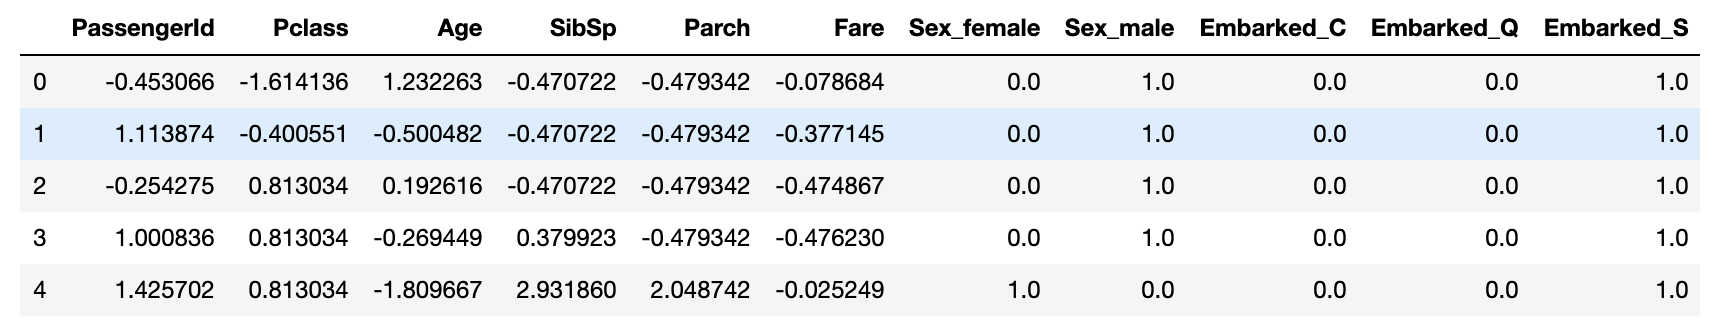

### An inline pipeline! Super compact!!

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from time import time


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value
# drop some categorical features for now
# we will do some feature engineering around this feature later
X = X.drop(['Name'], axis = 1)

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# determine categorical and numerical features
numerical_features = list(X.select_dtypes(include=['int64', 'float64']).columns)
categorical_features = list(X.select_dtypes(include=['object', 'bool']).columns)
print(f"numerical_features are  : {numerical_features}")
print(f"categorical_features are: {categorical_features}")
data_pipeline = make_column_transformer( #Level 2
    (make_pipeline(SimpleImputer(), StandardScaler()),      numerical_features), #level 3
    (make_pipeline(SimpleImputer(strategy='most_frequent'), 
                   OneHotEncoder(handle_unknown='ignore')), categorical_features)  
  )
X_train_transformed = data_pipeline.fit_transform(X_train)
print(type(X_train_transformed))
column_names = numerical_features  + list(data_pipeline.transformers_[1][1].named_steps["onehotencoder"].get_feature_names(categorical_features))
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]

# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe = make_pipeline( #level 1
    data_pipeline,
    LogisticRegression())

# Time and score test predictions
start = time()
clf_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe.score(X_train, y_train)
validAcc  = clf_pipe.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 1 LogReg with {number_of_inputs} inputs", "Titanic classes", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 1 LogReg pipeline with Cat+Num features"]

experimentLog

## Baseline classifier pipeline

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = [
    'Age', 
    'Parch', 
    'SibSp',
    'Fare'
]

# Create a pipeline for the numeric features.
# Use StandardScaler() to standardize the data
# Missing values will be imputed using the feature median.
#==================================================#
#               Your code starts here              #
#==================================================#

# TODO - change the following code
# num_pipeline =Pipeline()
                
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


# Identify the categorical features we wish to consider.
categorical_features = [
    "Embarked", 
    "Sex",
    "Pclass"
]
# Identify the range of expected values for the categorical features.
cat_values = [
    ['S','C','Q'],     # Embarked
    ['female','male'], # Sex
    [1,2,3] # Pclass
]

# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])

#==================================================#
#               Your code starts here              #
#==================================================#
# merge the scaled numeric and categorical features.
# drop all unused features
#data_pipeline = ColumnTransformer(transformer_list=[
#       #( name, transformer,     columns)
#        ("num_pipeline", num_pipeline, num_attribs),
#        .....
#        remainder=???
#         n_jobs=-1
#    ])


# TODO - change the following code
# data_pipeline = ColumnTransformer()           

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features)) 
display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]
# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe.score(X_train, y_train)
validAcc  = clf_pipe.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline 2 LogReg with {number_of_inputs} inputs", "Titanic classes", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "Baseline 2 LogReg pipeline with Cat+Num features"]

experimentLog

### Why is there a difference in the two baseline pipelines (Hint `Pclass`) 

The classifier pipelines  in section 4.1 lead to pipelines with different parameters and coefficients (see the test accuracies for both pipelines is different).

Why is this? Please explain in your own words. 

# Feature engineering part 1 of 3:  title feature
Feature engineering is so important to how your modeling pipeline performs, that even a simple pipeline with great features can outperform a complicated one with poor ones. In fact, feature engineering has been described as easily the most important factor in determining the success or failure of your predictive pipeline. Feature engineering, sometimes, really boils down to the human element in machine learning. How much you understand the data, with your human intuition, creativity, and domain expertise, can make the difference.

When conducting an end to end Machine Learning project, after exploring and preprocessing the data it is essential to think of `feature engineering`. It consists of creating new feature(s) based on the features that already exist in the dataset (or that can be merged in from an external/third-party dataset). These features can then  be used in during training the pipeline.

## Develop a new feature based on the title from each passengers name

### Explore the distribution of titles

In [ ]:
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions

data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

X_train['Name'][0:10].str.extract(' ([A-Z][a-z]+)\.').values.reshape(-1)

In [ ]:
titles_df = pd.DataFrame({"name":X_train['Name'],
              "Title": X_train['Name'].str.extract(' ([A-Z][a-z]+)\.').values.reshape(-1) } )
titles_df.head(10)

In [ ]:
sns.countplot(x='Title', data=titles_df)
plt.title('Distribution of Titles Amongst Passengers')
plt.xticks(rotation=90);
plt.grid()

### Consolidate special and miscellaneous titles
Most titles fall into one of four categories (`Mr`, `Mrs`, `Miss`, `Master`).  All other titles can either be:
* assigned naturally to  one of the top four (e.g., `Ms` can grouped with `Miss` with any loss of information) 
* or be grouped as `other`. 

In [ ]:
titles_df['Title'] = titles_df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
titles_df['Title'] = titles_df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 
                                       'Col', 'Capt', 'Countess', 'Jonkheer'],'Other')
sns.countplot(x='Title', data=titles_df);
plt.title('Distribution of Titles After Consolidation')
plt.grid()
titles_df['Title'].value_counts()

## Create a transformer to perfom this new feature transformation in a pipeline

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
import re
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.impute import SimpleImputer


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")


class TitleAdder(BaseEstimator, TransformerMixin):
    def __init__(self, features=None): # no *args or **kargs
        self.features = features
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        df = pd.DataFrame(X.copy(), columns=self.features)  # select a subset of columns in X based on self.features 
        #display(df)
        print(f"self.features: {self.features}")
        #from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit

        # use .str API to access re package in vectorized form
        df['Title'] = df[self.features[0]].str.extract(' ([A-Z][a-z]+)\.')
        # using the apply() method
        df['Title'] = df[self.features[0]].apply(lambda x: re.search(' ([A-Z][a-z]+)\.', x).group(1))
 
        # Apply the necessary transformations to obtain the 5 title categories
        # (Mr, Mrs, Miss, Master, Other) like it was done in section 5.1.2
        df['Title'] = df['Title'].replace({'Mlle':'Miss', 'Mme':'Mrs', 'Ms':'Miss'})
        df['Title'] = df['Title'].replace(['Don', 'Dona', 'Rev', 'Dr','Major', 'Lady', 'Sir', 
                                           'Col', 'Capt', 'Countess', 'Jonkheer'],'Other')
        #drop text features as we need to switch from a generic dateframe to a Numpy Array with the title column
        df.drop(self.features, axis=1, inplace=True)
        return df
    
test_pipeline = make_pipeline(TitleAdder(['Name']))
display(test_pipeline.fit_transform(X_train).head())
    
    
# test_driver_title_simple_TWO_step_pipeline(X_train):
test_pipeline = make_pipeline(TitleAdder(['Name']),
                              OneHotEncoder(handle_unknown='ignore'))
X_ts_sparse = test_pipeline.fit_transform(X_train)
ohe_col_names = list(test_pipeline.named_steps["onehotencoder"].categories_[0])
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
pd.DataFrame(np.c_[X_train["Name"],X_ts_sparse.toarray()], columns=['Name'] + ohe_col_names) 

## Classifier pipeline with title feature

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = [
    'Age', 
    'Parch', 
    'SibSp',
    'Fare'
]

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
categorical_features = [
    "Embarked", 
    "Sex",
    "Pclass"
]
# Identify the range of expected values for the categorical features.
cat_values = [
    ['S','C','Q'],     # Embarked
    ['female','male'], # Sex
    [1,2,3] # Pclass
]

cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


# Complete the code for the data pipeline for the title feature.
# Use OneHotEncoder(handle_unknown='ignore')) to OHE
#  Drop all remaining features

#==================================================#
#               Your code starts here              #
#==================================================#


              
                
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#


X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features)) +\
               list(data_pipeline.transformers_[2][1].named_steps["onehotencoder"].get_feature_names(name_feature))

display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]

# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe.score(X_train, y_train)
validAcc  = clf_pipe.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline LogReg with {number_of_inputs} inputs", "Titanic classes", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "LogReg pipeline with Cat+Num+Title features"]

experimentLog

In [ ]:
X_train.iloc[:5]

# Feature engineering part 2 of 3: number of tokens in the name feature


Build a new numeric feature based on the number of white space separated tokens in the `Name` field. For example, a name like `Navratil, Mr. Michel ("Louis M Hoffman")` yields a count of 6. A name string of `Soholt, Mr. Peter Andreas Lauritz Andersen` yields 6 also. Be sure to standardize this feature also. HINT: implement as a subpipeline within the ColumnTransformer list of transformers. Below is a sample of the expected out for this new feature:



<img src='datasets/images/image.png' width=400 align='center'>

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
import re
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.impute import SimpleImputer


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# TODO: Explore the feature here 
#number of white space separated tokens
np.max(X_train['Name'].apply(lambda x: len(re.split("\s", x))))
X_train[(X_train['Name'].apply(lambda x: len(re.split("\s", x))) >5) & (X_train["Sex"] == "male")]

HINT

X_train['Name'].apply(lambda x: len(re.split("\s", x))) returns a list of counts of number of white spaces. Use this for the code below.

## NameTokenCount transformer

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_pipeline
import re
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.impute import SimpleImputer


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")


class NameTokenCount(BaseEstimator, TransformerMixin):
    def __init__(self): # no *args or **kargs
        pass
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        # Complete the code for the transform here.
        ##HINT
        #1. Create a new column for counts of number of white spaces
        #2. Drop the feature that was initially passed
        #3. return df
        
        #==================================================#
        #               Your code starts here              #
        #==================================================#
        df = pd.DataFrame(X.copy())  # X is the feature being passed, in this case Name
        feature = "Name"
        #==================================================#
        #               Your code ends here                #
        #               Please don't add code below here   #
        #==================================================#
    
test_pipeline = make_pipeline(NameTokenCount())
name_token_count=  test_pipeline.fit_transform(X_train["Name"])
display(pd.DataFrame(np.c_[X_train["Name"],name_token_count], columns=['Name'] + ["name_token_count"]) )    
    
# test_driver_title_simple_TWO_step_pipeline(X_train):
test_pipeline = make_pipeline(NameTokenCount(),  StandardScaler())  
name_token_count = test_pipeline.fit_transform(X_train["Name"])
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
pd.DataFrame(np.c_[X_train["Name"],name_token_count], columns=['Name'] + ["name_token_count_std"]) 

## Classifier pipeline with  Name Token Count feature

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket', 'Cabin', 'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")

# Identify the numeric features we wish to consider. 
numerical_features = [
    'Age', 
    'Parch', 
    'SibSp',
    'Fare'
]
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

# Identify the categorical features we wish to consider.
categorical_features = [
    "Embarked", 
    "Sex",
    "Pclass"
]
# Identify the range of expected values for the categorical features.
cat_values = [
    ['S','C','Q'],     # Embarked
    ['female','male'], # Sex
    [1,2,3] # Pclass
]
# Create a pipelne for the categorical features.
# Entries with missing values or values that don't exist in the range
# defined above will be one hot encoded as zeroes.
cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
    ])


# Complete the code for the ColumnTransformer here
# by adding the "name_token_count" transformer
# which counts the number of whitespace based tokens
# and then standardizes the new feature
#==================================================#
#               Your code starts here              #
#==================================================#
name_feature = ["Name"]
data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features),    
  
],
         remainder='drop',
        n_jobs=-1
    )

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features)) +\
               ["name_token_count"]

display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]

# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe.score(X_train, y_train)
validAcc  = clf_pipe.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline LogReg with {number_of_inputs} inputs", "Titanic classes", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "LogReg pipeline with Cat+Num+Name_token_count features"]

experimentLog

## Classifier pipeline with Title and Name Token Count features

In [ ]:
# Complete the code for the ColumnTransformer here
# by adding the title_pipeline (with a OneHotEncoder(handle_unknown='ignore')))
# by adding the "name_token_count" transformer
# which counts the number of whitespace based tokens
# and then standardizes the new feature
#==================================================#
#               Your code starts here              #
#==================================================#

name_feature = ["Name"]
data_pipeline = ColumnTransformer( transformers= [
        # (name, transformer,     columns)
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features),    
        ],
         remainder='drop',
        n_jobs=-1
    )

#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#

X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["ohe"].get_feature_names(categorical_features)) +\
               list(data_pipeline.transformers_[2][1].named_steps["onehotencoder"].get_feature_names(name_feature))+\
               ["name_token_count"]

display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]

# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe.score(X_train, y_train)
validAcc  = clf_pipe.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline LogReg with {number_of_inputs} inputs", "Titanic classes", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "LogReg pipeline with Cat+Num+Title+NameTokCount features"]

experimentLog

# Feature engineering Part 3 of 3: Cabin feature

So far we have dropped the `Cabin` feature. Please include it for this section of the homework as you will be building a new feature based on it. As you will see the the `Cabin` feature has lots of missing values? Why is this? 

The non-missing `Cabin` values consist of a single letter at the beginning followed by a two or three digit number, for example, `C125`. It seems logical that the letter would represent the deck or section of boat where the cabin was located followed by the room number. It would seem that if you knew the section of the boat where someone was staying it would give you a lot of insight into their chances of survival. With that in mind let's work on cleaning up that column and seeing what we can get out of it. I will leave it to you to explore different feature derivations.


In your analysis, please assumme the following:

```python
numerical_features = ['Age', 'Parch', 'SibSp', 'Fare'] 
categorical_features = ["Embarked", "Sex", "Pclass"]
name_feature = ["Name"]

data_pipeline = ColumnTransformer( transformers= [
        # (name,        transformer,     columns)
        ("num_pipeline", num_pipeline, numerical_features),
        ("cat_pipeline", cat_pipeline, categorical_features),    
        ("title_pipeline",  make_pipeline(TitleAdder(name_feature), 
                                         OneHotEncoder(handle_unknown='ignore')), name_feature), 
        ],
         remainder='drop',
        n_jobs=-1
    )

```
and modify the data_pipeline by adding in a `cabin-pipeline` sub-pipeline.

Please follow a similar experimental setup as was presented in previous sections by working the  `X_train`, `y_train` datasets etc.


In reporting your results, please address the following:

* Please report the `TrainAcc`	`ValidAcc`	`TestAcc` for the your best `Cabin`-based feature (assuming you will build many!!) for the following experimental setups:

  * Logistic Regression pipeline with the  `numerical_features` and `categorical_features` and your derived `Cabin`
  * Logistic Regression pipeline with the  `numerical_features`, `categorical_features`, and `Title` and your derived `Cabin`
  
  





## EDA for the `Cabin` feature

The following serves as a starter for doing some exploratory analysis of the `Cabin` feature. Please feel free adapt and create some amazing `Cabin`-feature based derivatives.


In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket',  'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")


cabin_only = X_train[["Cabin"]].copy()
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)

In [ ]:
cabin_only[cabin_only.Cabin_Data].head()

In [ ]:
sum(cabin_only.Cabin_Data)

### Next steps: possible Cabin based features

Here I am  looking for a single feature, but multiple are possible.
* Let's  take just the first character of the Cabin feature (ignore multi room Cabin values) and assign it to a new column called `Deck`.  
* We could also process the  numerical sequence right after this letter and assign it to a  `room number` feature but it would require a bit more engineering to make this useful. For example, bucketize/discretize the room numbers to 1-10, 11-20, 21-30. I leave that additional task for you to try on your own time.

In [ ]:
cabin_only.Cabin.str[0].value_counts()

##  `Cabin` Transformer

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import re
from time import time


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket',  'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")


cabin_only = X_train[["Cabin"]].copy()
cabin_only["Cabin_Data"] = cabin_only["Cabin"].isnull().apply(lambda x: not x)
cabin_feature = ["Cabin"]

class CabinTransformer(BaseEstimator, TransformerMixin):
    """ We just  focus on the first letter of the first Cabin (ignore multiple cabins)
        Also some Cabin values have some strange values `E G343`
        Assign passengers with no assigned cabins to Common Area (CA)
        """
    def __init__(self, features=None):
        self.features = features
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        # Create a new column 'Deck' that is the first letter of cabin
        # Assign passengers with no assigned cabins to Common Area (CA)
        #==================================================#
        #               Your code starts here              #
        #==================================================#
        df = pd.DataFrame(X.copy(), columns=self.features)
        
        
        
        #==================================================#
        #               Your code ends here                #
        #               Please don't add code below here   #
        #==================================================#

    
cabin_feature = ["Cabin"]

test_pipeline = make_pipeline(CabinTransformer(cabin_feature))

display(test_pipeline.fit_transform(X_train['Cabin']).head())
test_pipeline.fit_transform(X_train['Cabin']).count()


    
# test_driver_title_simple_TWO_step_pipeline(X_train):
cabin_feature = ["Cabin"]
test_pipeline = make_pipeline(CabinTransformer(cabin_feature),
                              OneHotEncoder(handle_unknown='ignore'))
X_ts_sparse = test_pipeline.fit_transform(X_train)
ohe_col_names = list(test_pipeline.named_steps["onehotencoder"].categories_[0])
#from IPython.core.debugger import Pdb as pdb;    pdb().set_trace() #breakpoint; dont forget to quit
pd.DataFrame(np.c_[X_train[cabin_feature],X_ts_sparse.toarray()], columns=['Name'] + ohe_col_names) 

## Classifier pipeline with your newly derived `Cabin` feature

In [ ]:
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split  # sklearn.cross_validation in old versions
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import re
from time import time


data = pd.read_csv('datasets/titanic/train.csv')
y = data['Survived']
X = data.drop(['Survived', 'Ticket',  'PassengerId'], axis = 1) #drop some features with questionable value

# Split the provided training data into training and validationa and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print(f"X train           shape: {X_train.shape}")
print(f"X validation      shape: {X_valid.shape}")
print(f"X test            shape: {X_test.shape}")


class CabinTransformer(BaseEstimator, TransformerMixin):
    """ We just  focus on the first letter of the first Cabin (ignore multiple cabins)
        Also some Cabin values have some strange values `E G343`
        Assign passengers with no assigned cabins to Common Area (CA)
        """
    def __init__(self, features=None):
        self.features = features
    def fit(self, X, y=None):
        return self
    def transform(self, X):

#==================================================#
#               Use the same transform in the previous question             
#==================================================#
    

name_feature = ["Name"]
cabin_feature = ["Cabin"]
numerical_features = ['Age',  'Parch', 'SibSp', 'Fare']
categorical_features = ["Embarked", "Sex", "Pclass"]  

#Complete the code for the ColumnTransformer here
# by adding the "CabinTransformer" transformer
# and then onehotencoding the new feature (with a OneHotEncoder(handle_unknown='ignore')))
#==================================================#
#               Your code starts here              #
#==================================================#
    

data_pipeline = ColumnTransformer( transformers= [
        # (name,            transformer,         columns)
        ("num_pipeline", make_pipeline(SimpleImputer(strategy="median"), StandardScaler()), numerical_features),
        ("cat_pipeline", make_pipeline(SimpleImputer(strategy='most_frequent'), 
              OneHotEncoder(sparse=False, handle_unknown="ignore")),     categorical_features),    
        ...........
        ],
         remainder='drop',
        n_jobs=-1
    )
#==================================================#
#               Your code ends here                #
#               Please don't add code below here   #
#==================================================#
X_train_transformed = data_pipeline.fit_transform(X_train)
column_names = numerical_features  + \
               list(data_pipeline.transformers_[1][1].named_steps["onehotencoder"].get_feature_names(categorical_features)) +\
               list(data_pipeline.transformers_[2][1].named_steps["onehotencoder"].get_feature_names(cabin_feature))

display(pd.DataFrame(X_train_transformed,  columns=column_names).head())
number_of_inputs = X_train_transformed.shape[1]

# Now we can combine this preprocessing step based on the ColumnTransformer with a
# classifier in a Pipeline to predict whether passengers of the Titanic survived or not:
clf_pipe = make_pipeline(
    data_pipeline,
    LogisticRegression())
# Time and score test predictions
start = time()
clf_pipe.fit(X_train, y_train)
train_time = np.round(time() - start, 4)

trainAcc  = clf_pipe.score(X_train, y_train)
validAcc  = clf_pipe.score(X_valid, y_valid)
start = time()
testAcc  = clf_pipe.score(X_test, y_test)
test_time = np.round(time() - start, 4)

#del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=["Pipeline", "Dataset", "TrainAcc", "ValidAcc", "TestAcc",
                                               "Train Time(s)",  "Test Time(s)", "Description",])
experimentLog.loc[len(experimentLog)] =[f"Baseline LogReg with {number_of_inputs} inputs", "Titanic classes", 
                                        f"{trainAcc*100:8.2f}%", f"{validAcc*100:8.2f}%", f"{testAcc*100:8.2f}%",
                                        train_time, test_time,
                                        "LogReg pipeline with Cabin+Cat+Num features"]

experimentLog

## Discussion of results